In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook
%matplotlib inline
from matplotlib.ticker import FuncFormatter, FixedLocator

import palettable
colors = palettable.tableau.Tableau_10.mpl_colors

In [2]:
DATA_DIRECTOY = "/run/media/sebastian/shoerl_data/mode_choice_paper"

In [3]:
unfinished = []
differences = []
abs_differences = []
rel_differences = []

N = 100

for i in tqdm_notebook(range(1, N + 1)):
    df = pd.read_csv("%s/tracking/%d.tracked_travel_times.csv" % (DATA_DIRECTOY, i), sep = ";")
    unfinished.append(np.sum(df["observation"].isnull()))
    
    df = df[
        ~df["observation"].isnull()
    ][["predicted_trip_travel_time", "observation"]]
    
    prediction = df["predicted_trip_travel_time"]
    observation = df["observation"]
    
    f = np.isfinite(prediction)
    prediction = prediction[f]
    observation = observation[f]
    
    local_differences = np.abs(prediction - observation)    
    abs_differences.append(local_differences)
    rel_differences.append(prediction / observation - 1)
    
    local_differences = prediction - observation
    differences.append(local_differences)

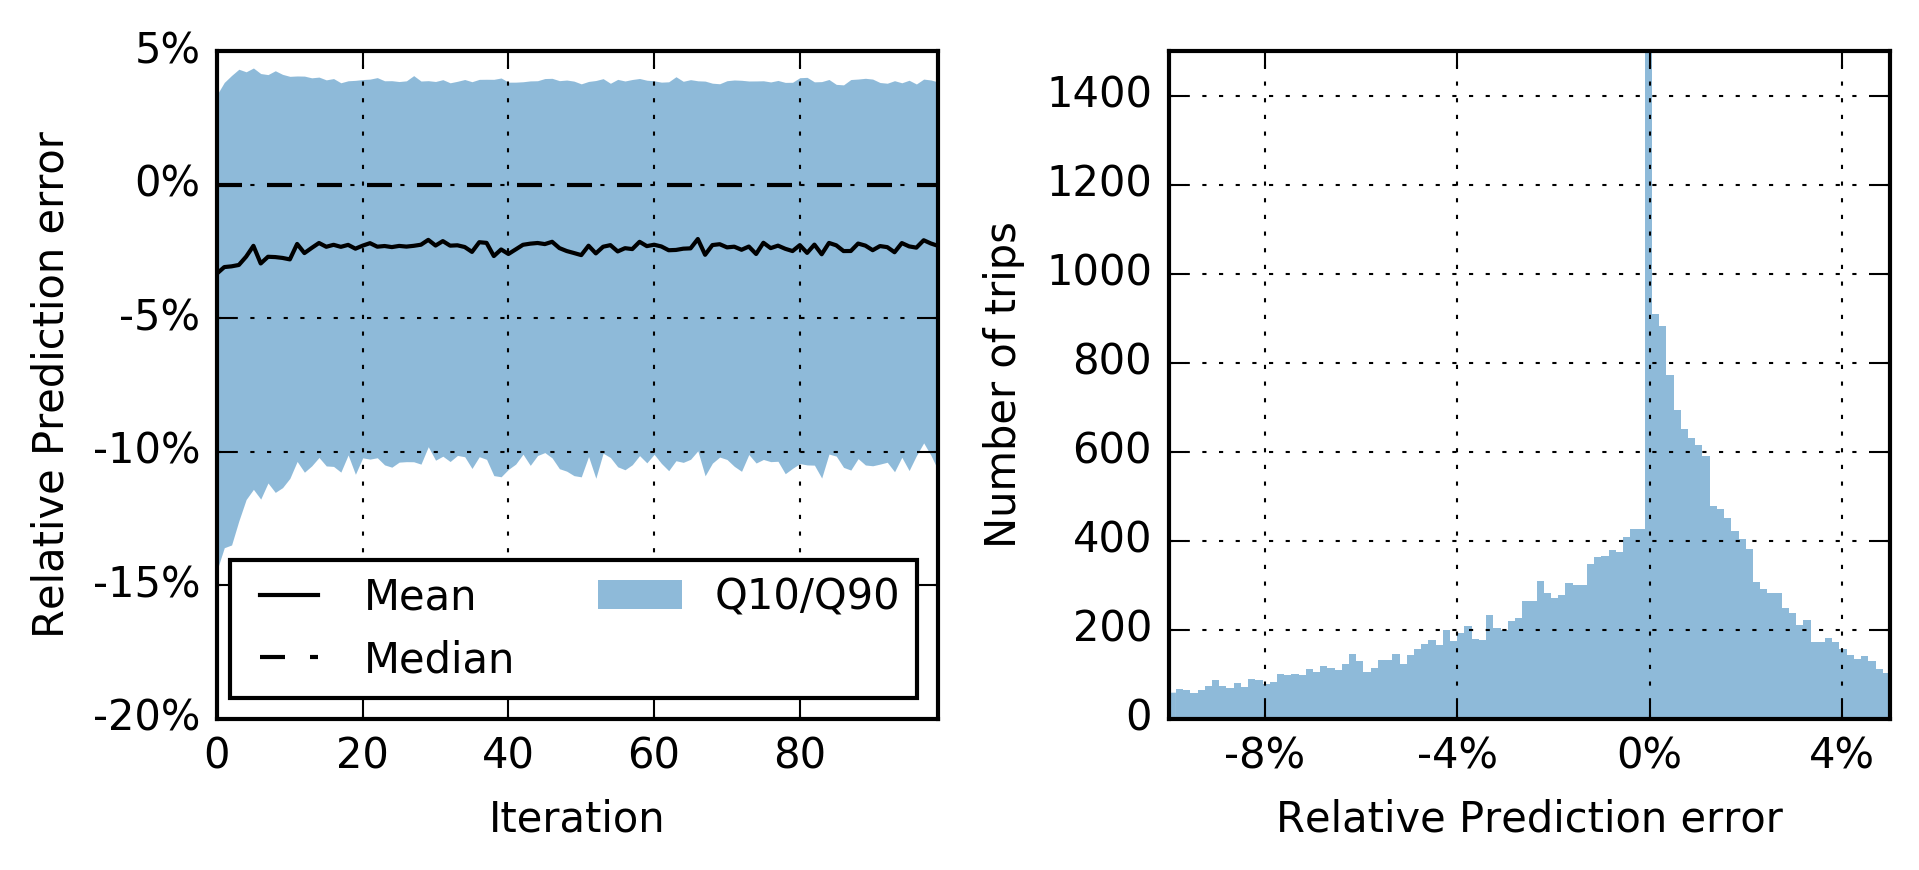

In [12]:
plt.figure(dpi = 300, figsize = (6.5, 3))

plt.subplot(1,2,1)
slot = rel_differences

means = np.array([np.mean(d) for d in slot])
medians = np.array([np.median(d) for d in slot])
q90s = np.array([np.percentile(d, 90) for d in slot])
q10s = np.array([np.percentile(d, 10) for d in slot])

plt.fill_between(np.arange(N), q10s, q90s, color = colors[0], alpha = 0.5, label = "Q10/Q90", linewidth = 0)
plt.plot(np.arange(N), means, 'k-', label = "Mean")
plt.plot(np.arange(N), medians, 'k--', label = "Median")
plt.ylabel("Prediction error [s]")

plt.legend(ncol = 2, loc = "lower right", fontsize = 10)
plt.grid()
plt.ylim([-0.15, 0.05])
plt.xlabel("Iteration")
plt.xlim([0, 99])
plt.ylim([-0.2, 0.05])

plt.ylabel("Relative Prediction error")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x,p: "%.0f%%" % (x * 100,)))

plt.subplot(1,2,2)
histdata = slot[99]
histdata = histdata[histdata >= -0.1]
histdata = histdata[histdata <= 0.05]
plt.hist(histdata, bins = 100, linewidth = 0, color = colors[0], alpha = 0.5)
plt.xlabel("Relative Prediction error")
plt.gca().xaxis.set_major_locator(FixedLocator(np.arange(100) * 0.04 - 0.2))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,p: "%.0f%%" % (x * 100,)))
plt.grid()
plt.ylim([0, 1500])
plt.xlim([-0.1, 0.05000000001])
plt.ylabel("Number of trips")
plt.tight_layout()

plt.savefig("plots/prediction.pdf")